Mounting Google Drive...
Mounted at /content/drive

EXAMPLE CONFIGURATIONS:
------------------------------
1. Classification with 10k samples:
   SAMPLE_SIZE = 10000
   TARGET_COLUMN = 'label'  # or 'class', 'target', etc.

2. Regression with 5k samples:
   SAMPLE_SIZE = 5000
   TARGET_COLUMN = 'price'  # or any continuous variable

3. Unsupervised learning:
   SAMPLE_SIZE = 8000
   TARGET_COLUMN = None

4. Large sample for deep learning:
   SAMPLE_SIZE = 50000
   TARGET_COLUMN = 'category'
Starting Random Sampling Process...
Loading dataset from: /content/drive/MyDrive/FYP/web-ids23_dos_http.csv
Dataset loaded successfully!
Shape: (86443, 38)
Memory usage: 66.45 MB

DATASET EXPLORATION
Dataset shape: (86443, 38)
Columns: ['uid', 'ts', 'id.orig_h', 'id.resp_h', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'f

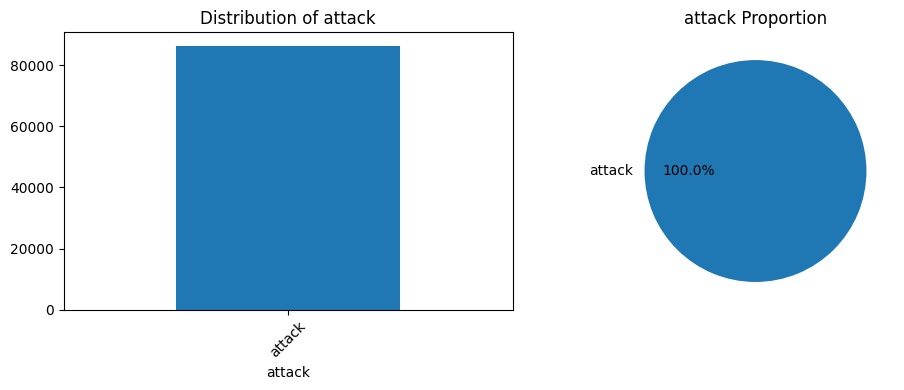


Performing stratified random sampling...
Original dataset size: 86443
Target sample size: 10000
Using stratified sampling based on 'attack'
Original class distribution:
attack
attack    86443
Name: count, dtype: int64
Class 'attack': 10000 samples
Final sampled dataset size: 10000
Sampled class distribution:
attack
attack    10000
Name: count, dtype: int64
Train set size: 8000
Test set size: 2000
Train class distribution:
attack
attack    8000
Name: count, dtype: int64
Test class distribution:
attack
attack    2000
Name: count, dtype: int64

SAMPLING QUALITY VALIDATION
Dataset size comparison:
Original: 86,443 samples
Sampled: 10,000 samples
Sampling ratio: 11.57%

Class distribution comparison:
        Original  Sampled  Difference
attack                               
attack       1.0      1.0         0.0


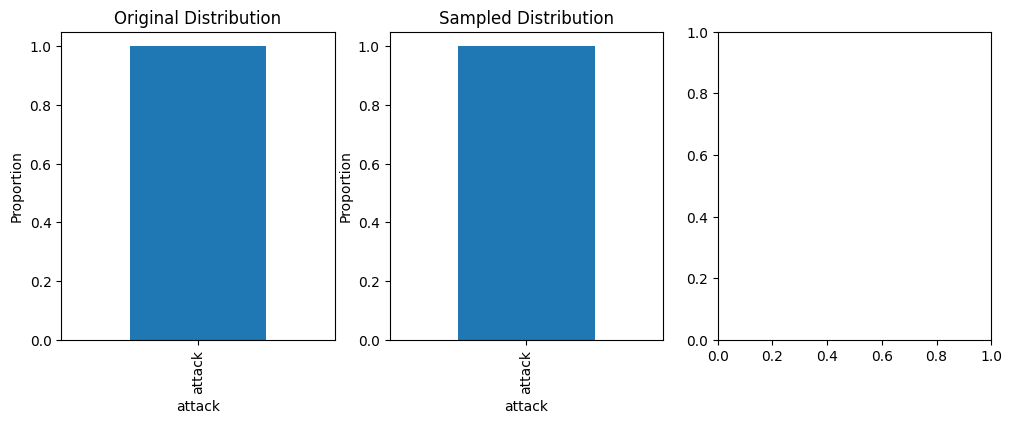

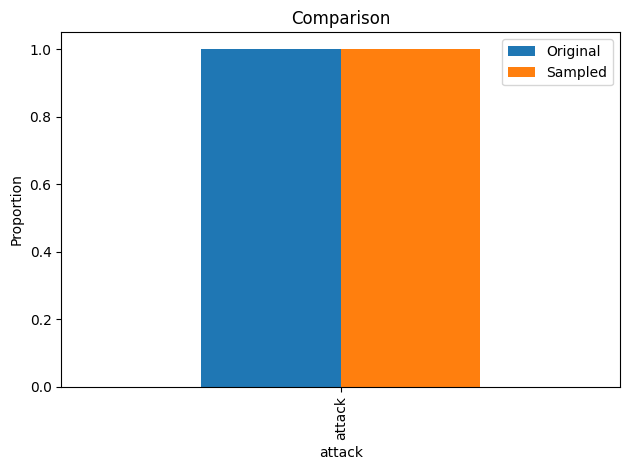


Saving datasets to: /content/drive/MyDrive/FYP/sampled_datasets/Testing/attack
Files saved successfully:
  - /content/drive/MyDrive/FYP/sampled_datasets/Testing/attack/sampled_dataset_10000_20250602_095721.csv
  - /content/drive/MyDrive/FYP/sampled_datasets/Testing/attack/train_set_8000_20250602_095721.csv
  - /content/drive/MyDrive/FYP/sampled_datasets/Testing/attack/test_set_2000_20250602_095721.csv

PROCESS COMPLETED SUCCESSFULLY!
Original dataset: 86,443 samples
Sampled dataset: 10,000 samples
Training set: 8,000 samples
Test set: 2,000 samples
Files saved to: /content/drive/MyDrive/FYP/sampled_datasets/Testing/attack


In [1]:
# Random Sampling for Machine Learning Training
# Designed for Google Colab with Google Drive integration

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Configuration
class Config:
    # File paths (modify these according to your structure)
    DRIVE_PATH = '/content/drive/MyDrive/FYP/'
    DATASET_PATH = 'web-ids23_dos_http.csv'  # Change this to your dataset filename
    OUTPUT_FOLDER = '/content/drive/MyDrive/FYP/sampled_datasets/Testing/attack'

    # Sampling parameters
    SAMPLE_SIZE = 10000  # Adjust based on your needs (2k-50k typically works well)
    RANDOM_STATE = 42    # For reproducibility
    TEST_SIZE = 0.2      # 80% train, 20% test

    # Target column (if classification - set to None for unsupervised learning)
    TARGET_COLUMN = 'attack'  # Change this to your actual target column name

config = Config()

def load_dataset(file_path):
    """Load dataset with error handling"""
    try:
        print(f"Loading dataset from: {file_path}")

        # Try different file formats
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file_path.endswith('.parquet'):
            df = pd.read_parquet(file_path)
        elif file_path.endswith(('.xlsx', '.xls')):
            df = pd.read_excel(file_path)
        else:
            # Default to CSV
            df = pd.read_csv(file_path)

        print(f"Dataset loaded successfully!")
        print(f"Shape: {df.shape}")
        print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        return df

    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def explore_dataset(df, target_col=None):
    """Basic dataset exploration"""
    print("\n" + "="*50)
    print("DATASET EXPLORATION")
    print("="*50)

    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes.value_counts()}")
    print(f"Missing values:\n{df.isnull().sum().sum()} total missing values")

    if target_col and target_col in df.columns:
        print(f"\nTarget variable '{target_col}' distribution:")
        print(df[target_col].value_counts())

        # Plot target distribution
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        df[target_col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {target_col}')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        df[target_col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'{target_col} Proportion')
        plt.ylabel('')

        plt.tight_layout()
        plt.show()

def stratified_random_sampling(df, sample_size, target_col=None, random_state=42):
    """
    Perform stratified random sampling to maintain class distribution
    """
    print(f"\nPerforming stratified random sampling...")
    print(f"Original dataset size: {len(df)}")
    print(f"Target sample size: {sample_size}")

    if target_col and target_col in df.columns:
        # Stratified sampling for classification
        print(f"Using stratified sampling based on '{target_col}'")

        # Calculate proportional sample sizes for each class
        class_counts = df[target_col].value_counts()
        print(f"Original class distribution:\n{class_counts}")

        sampled_dfs = []

        for class_value in class_counts.index:
            class_df = df[df[target_col] == class_value]
            class_proportion = len(class_df) / len(df)
            class_sample_size = max(1, int(sample_size * class_proportion))

            if len(class_df) >= class_sample_size:
                class_sample = class_df.sample(n=class_sample_size, random_state=random_state)
            else:
                # If class has fewer samples than required, take all
                class_sample = class_df.copy()
                print(f"Warning: Class '{class_value}' has only {len(class_df)} samples, taking all")

            sampled_dfs.append(class_sample)
            print(f"Class '{class_value}': {len(class_sample)} samples")

        # Combine all class samples
        sampled_df = pd.concat(sampled_dfs, ignore_index=True)

        # Shuffle the final dataset
        sampled_df = sampled_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    else:
        # Simple random sampling for regression or unsupervised learning
        print("Using simple random sampling")
        if len(df) >= sample_size:
            sampled_df = df.sample(n=sample_size, random_state=random_state)
        else:
            print(f"Warning: Dataset has only {len(df)} samples, using entire dataset")
            sampled_df = df.copy()

    print(f"Final sampled dataset size: {len(sampled_df)}")

    if target_col and target_col in sampled_df.columns:
        print(f"Sampled class distribution:\n{sampled_df[target_col].value_counts()}")

    return sampled_df

def create_train_test_split(df, test_size=0.2, target_col=None, random_state=42):
    """Create train-test split with stratification if applicable"""

    if target_col and target_col in df.columns:
        # Stratified split for classification
        X = df.drop(columns=[target_col])
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            random_state=random_state,
            stratify=y
        )

        # Combine back into DataFrames
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([X_test, y_test], axis=1)

        print(f"Train set size: {len(train_df)}")
        print(f"Test set size: {len(test_df)}")
        print(f"Train class distribution:\n{train_df[target_col].value_counts()}")
        print(f"Test class distribution:\n{test_df[target_col].value_counts()}")

    else:
        # Simple split for regression or unsupervised
        train_df, test_df = train_test_split(
            df,
            test_size=test_size,
            random_state=random_state
        )

        print(f"Train set size: {len(train_df)}")
        print(f"Test set size: {len(test_df)}")

    return train_df, test_df

def save_datasets(train_df, test_df, sampled_df, output_folder, drive_path):
    """Save datasets to Google Drive"""

    # Create output directory
    full_output_path = os.path.join(drive_path, output_folder)
    os.makedirs(full_output_path, exist_ok=True)

    print(f"\nSaving datasets to: {full_output_path}")

    # Generate timestamp for unique filenames
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save files
    files_saved = []

    # Full sampled dataset
    sampled_path = os.path.join(full_output_path, f'sampled_dataset_{config.SAMPLE_SIZE}_{timestamp}.csv')
    sampled_df.to_csv(sampled_path, index=False)
    files_saved.append(sampled_path)

    # Training set
    train_path = os.path.join(full_output_path, f'train_set_{len(train_df)}_{timestamp}.csv')
    train_df.to_csv(train_path, index=False)
    files_saved.append(train_path)

    # Test set
    test_path = os.path.join(full_output_path, f'test_set_{len(test_df)}_{timestamp}.csv')
    test_df.to_csv(test_path, index=False)
    files_saved.append(test_path)

    print("Files saved successfully:")
    for file_path in files_saved:
        print(f"  - {file_path}")

    return files_saved

def validate_sampling_quality(original_df, sampled_df, target_col=None):
    """Validate the quality of sampling"""
    print("\n" + "="*50)
    print("SAMPLING QUALITY VALIDATION")
    print("="*50)

    # Basic statistics comparison
    print("Dataset size comparison:")
    print(f"Original: {len(original_df):,} samples")
    print(f"Sampled: {len(sampled_df):,} samples")
    print(f"Sampling ratio: {len(sampled_df)/len(original_df)*100:.2f}%")

    if target_col and target_col in original_df.columns:
        # Compare class distributions
        orig_dist = original_df[target_col].value_counts(normalize=True).sort_index()
        samp_dist = sampled_df[target_col].value_counts(normalize=True).sort_index()

        print(f"\nClass distribution comparison:")
        comparison_df = pd.DataFrame({
            'Original': orig_dist,
            'Sampled': samp_dist,
            'Difference': abs(orig_dist - samp_dist)
        })
        print(comparison_df)

        # Plot comparison
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        orig_dist.plot(kind='bar', title='Original Distribution')
        plt.ylabel('Proportion')

        plt.subplot(1, 3, 2)
        samp_dist.plot(kind='bar', title='Sampled Distribution')
        plt.ylabel('Proportion')

        plt.subplot(1, 3, 3)
        comparison_df[['Original', 'Sampled']].plot(kind='bar', title='Comparison')
        plt.ylabel('Proportion')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Main execution
def main():
    print("Starting Random Sampling Process...")
    print("="*60)

    # Load dataset
    full_dataset_path = os.path.join(config.DRIVE_PATH, config.DATASET_PATH)
    df = load_dataset(full_dataset_path)

    if df is None:
        print("Failed to load dataset. Please check the file path.")
        return

    # Explore dataset
    explore_dataset(df, config.TARGET_COLUMN)

    # Perform sampling
    sampled_df = stratified_random_sampling(
        df,
        config.SAMPLE_SIZE,
        config.TARGET_COLUMN,
        config.RANDOM_STATE
    )

    # Create train-test split
    train_df, test_df = create_train_test_split(
        sampled_df,
        config.TEST_SIZE,
        config.TARGET_COLUMN,
        config.RANDOM_STATE
    )

    # Validate sampling quality
    validate_sampling_quality(df, sampled_df, config.TARGET_COLUMN)

    # Save datasets
    saved_files = save_datasets(train_df, test_df, sampled_df, config.OUTPUT_FOLDER, config.DRIVE_PATH)

    print("\n" + "="*60)
    print("PROCESS COMPLETED SUCCESSFULLY!")
    print("="*60)
    print(f"Original dataset: {len(df):,} samples")
    print(f"Sampled dataset: {len(sampled_df):,} samples")
    print(f"Training set: {len(train_df):,} samples")
    print(f"Test set: {len(test_df):,} samples")
    print(f"Files saved to: {os.path.join(config.DRIVE_PATH, config.OUTPUT_FOLDER)}")

# Example usage for different scenarios
def example_configurations():
    """Show different configuration examples"""
    print("\nEXAMPLE CONFIGURATIONS:")
    print("-" * 30)

    print("1. Classification with 10k samples:")
    print("   SAMPLE_SIZE = 10000")
    print("   TARGET_COLUMN = 'label'  # or 'class', 'target', etc.")

    print("\n2. Regression with 5k samples:")
    print("   SAMPLE_SIZE = 5000")
    print("   TARGET_COLUMN = 'price'  # or any continuous variable")

    print("\n3. Unsupervised learning:")
    print("   SAMPLE_SIZE = 8000")
    print("   TARGET_COLUMN = None")

    print("\n4. Large sample for deep learning:")
    print("   SAMPLE_SIZE = 50000")
    print("   TARGET_COLUMN = 'category'")

# Run the main function
if __name__ == "__main__":
    # Show configuration examples
    example_configurations()

    # Run main process
    main()

# Additional utility functions for advanced users
def multiple_sampling_experiments(df, sample_sizes, target_col=None, num_runs=5):
    """
    Run multiple sampling experiments to test consistency
    """
    results = {}

    for size in sample_sizes:
        results[size] = []

        for run in range(num_runs):
            sampled_df = stratified_random_sampling(
                df, size, target_col, random_state=42+run
            )

            # You can add your model training and evaluation here
            # For now, just store basic statistics
            if target_col and target_col in sampled_df.columns:
                class_dist = sampled_df[target_col].value_counts(normalize=True)
                results[size].append(class_dist)
            else:
                results[size].append(len(sampled_df))

    return results

# Uncomment the following lines to run multiple experiments
# print("Running multiple sampling experiments...")
# experiment_results = multiple_sampling_experiments(df, [2000, 5000, 10000], config.TARGET_COLUMN)
# print("Experiment results:", experiment_results)